In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = r"C:\Users\Abhim\Documents\Python_Programs\airfare_dset\Cleaned_dataset.csv"
df = pd.read_csv(file)

df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])

In [3]:
df = df.dropna()
df.drop_duplicates( keep='first', inplace=True)
df = df.reset_index(drop = True)
df.shape

(445366, 13)

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Airline'] = le.fit_transform(df['Airline'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Source'] = le.fit_transform(df['Source'])
df['Destination'] = le.fit_transform(df['Destination'])
df['Class'] = le.fit_transform(df['Class'])
print (dict(zip(le.classes_,range(len(le.classes_)))))
df['Arrival'] = le.fit_transform(df['Arrival'])
df['Departure'] = le.fit_transform(df['Departure'])
df['Journey_day'] = le.fit_transform(df['Journey_day'])
df['Flight_code'] = le.fit_transform(df['Flight_code'])
df['Total_stops'] = le.fit_transform(df['Total_stops'])

{'Air India': 0, 'AirAsia': 1, 'AkasaAir': 2, 'AllianceAir': 3, 'GO FIRST': 4, 'Indigo': 5, 'SpiceJet': 6, 'StarAir': 7, 'Vistara': 8}
{'Business': 0, 'Economy': 1, 'First': 2, 'Premium Economy': 3}


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

X=df.drop(['Fare'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left
350132,2023-02-02,4,8,1300,0,2,0,0,2,3,-0.675744,-0.532618
253225,2023-02-17,0,8,1304,3,4,1,0,2,6,-0.047839,0.516143
300824,2023-03-05,3,5,4,1,5,2,0,2,3,-1.052489,1.634821
203178,2023-02-14,5,5,355,1,1,2,0,1,4,-0.572995,0.306390
13353,2023-02-19,3,8,1259,0,3,0,0,2,6,-0.835580,0.655977
...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2023-01-21,2,0,752,0,4,1,2,1,1,-1.486322,-1.371627
365838,2023-02-12,3,8,1305,1,2,1,1,2,6,-0.025001,0.166556
131932,2023-01-31,5,0,856,1,6,1,0,2,5,0.032086,-0.672453
146867,2023-02-14,5,8,1403,3,6,2,0,0,2,1.322146,0.306390


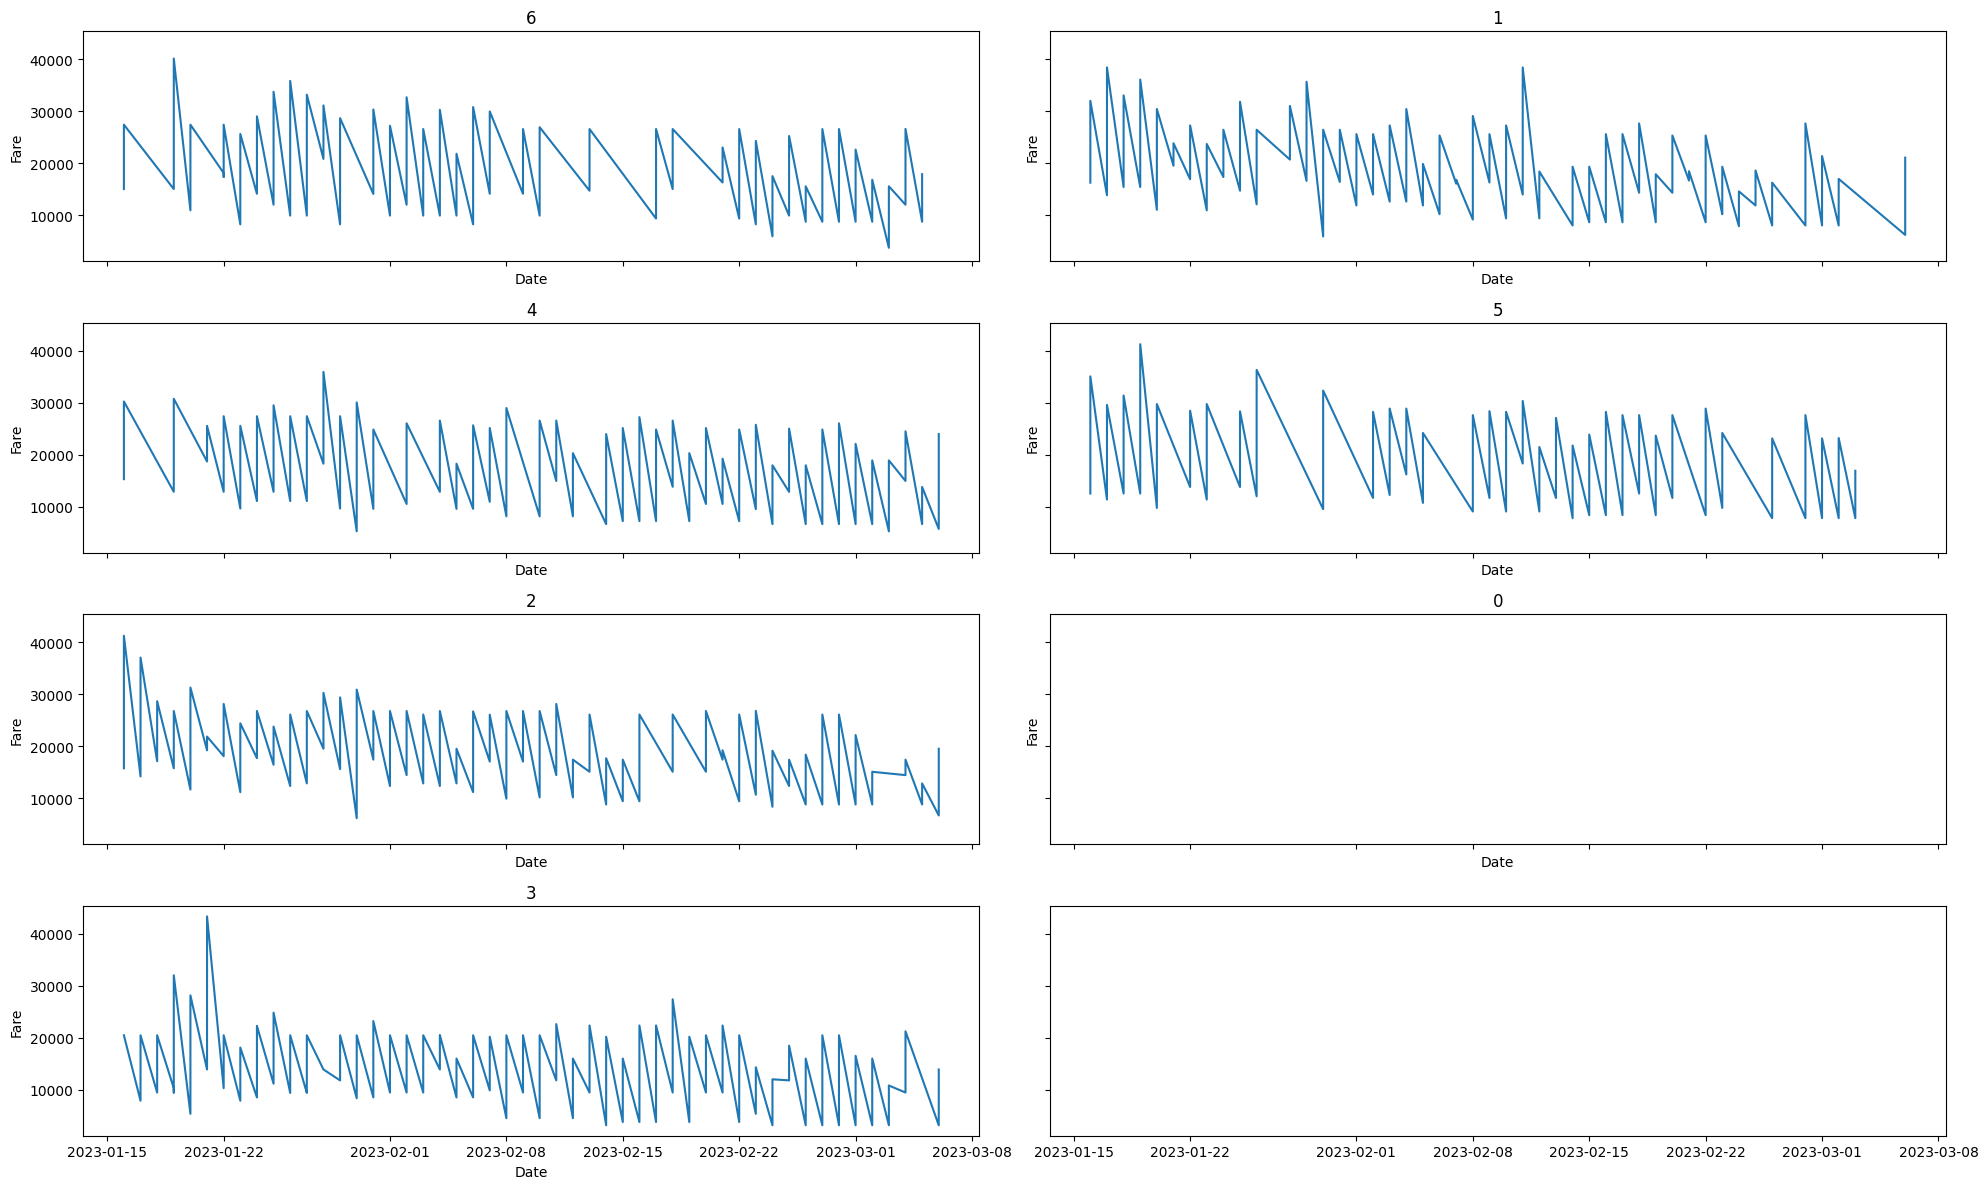

In [7]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = df["Destination"].unique()
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):

    subset = df[df["Airline"] == 0]
    subset = subset[subset["Class"] == 1]
    subset = subset[subset["Source"] == 0]
    subset = subset[subset["Destination"] == destination]
    
    axs[i].set_title(destination)
    axs[i].plot(subset["Date_of_journey"], subset["Fare"])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Fare')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError for 0: negative dimensions are not allowed


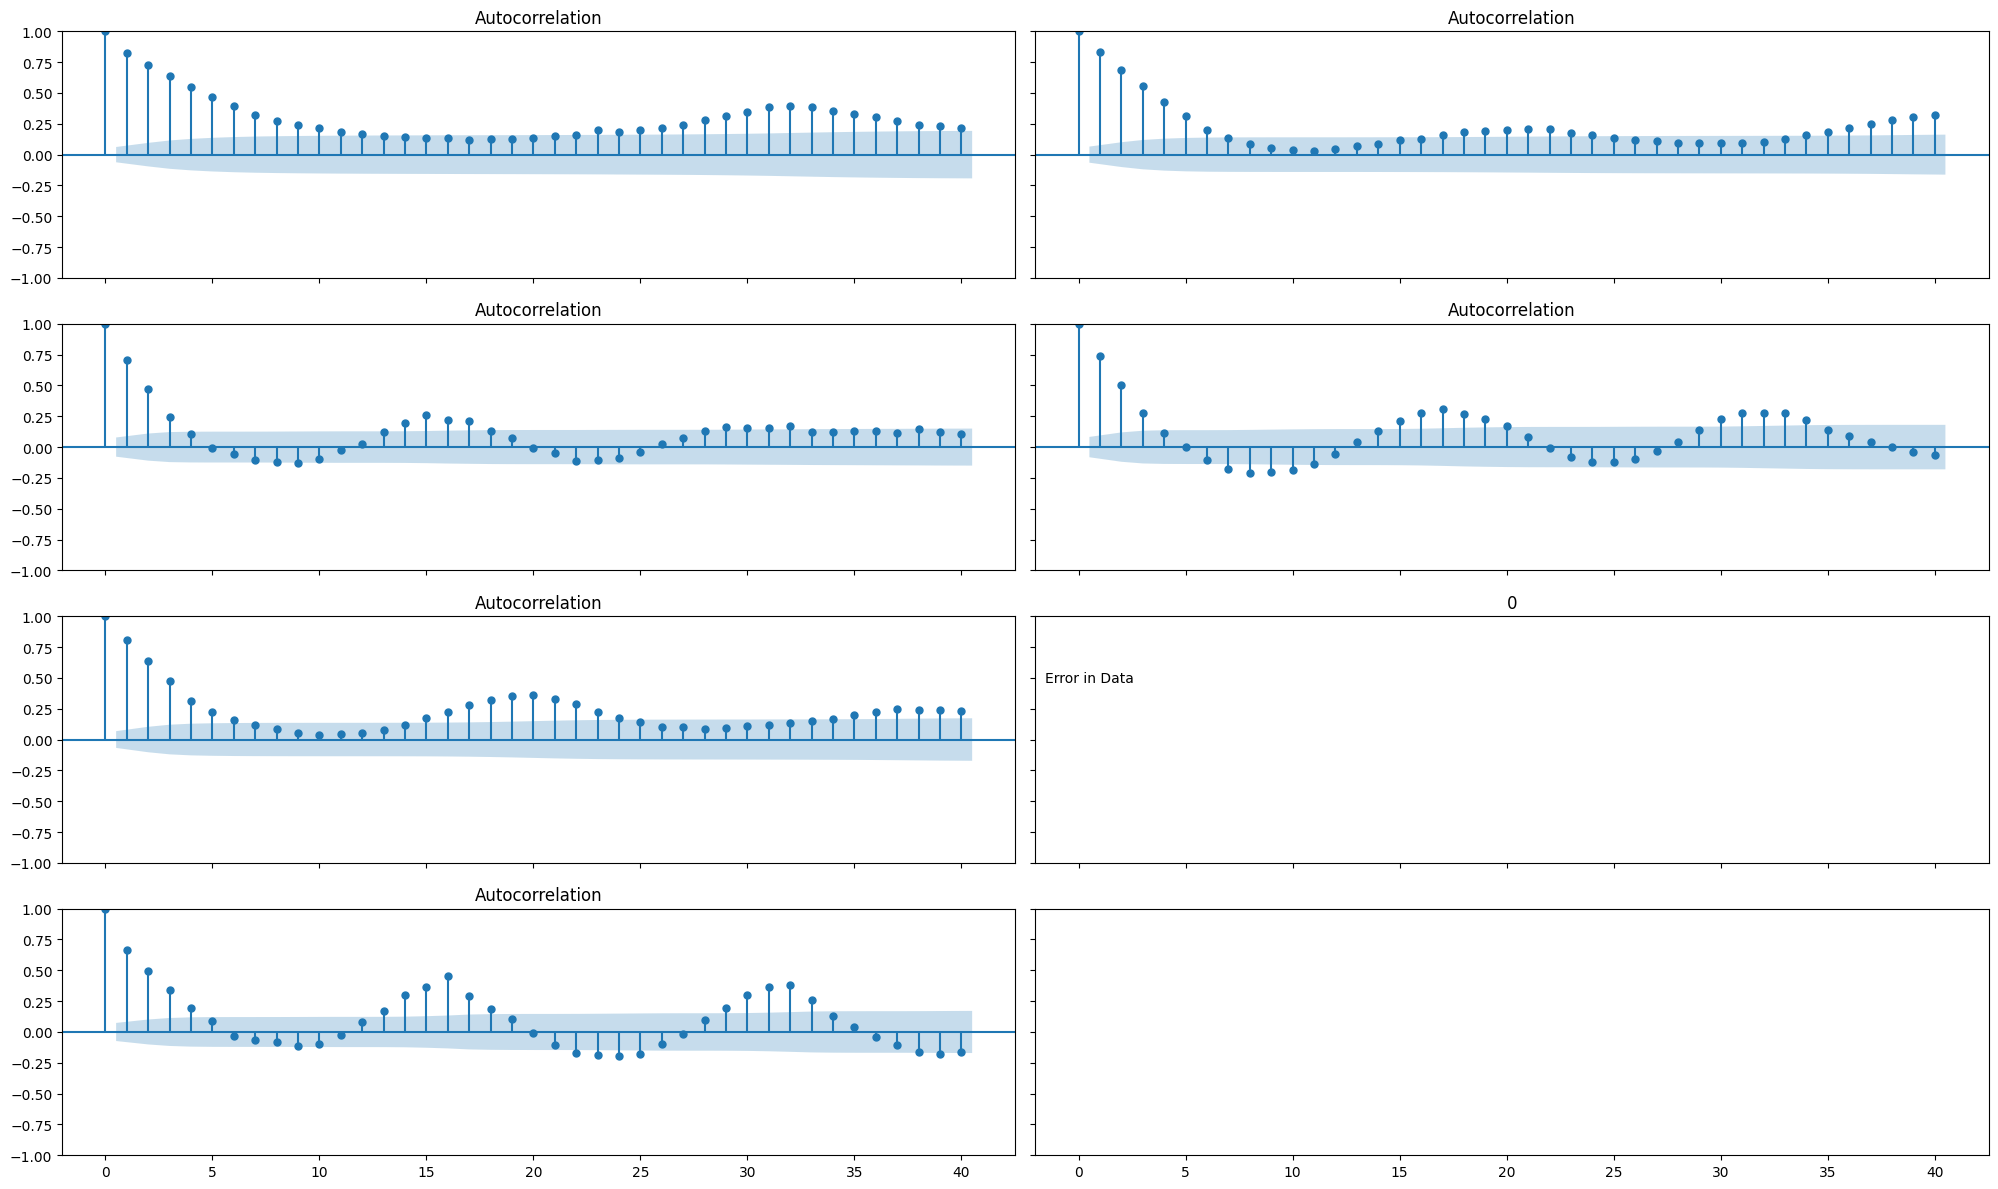

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = df["Destination"].unique()
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):
    
    try:
        subset = df[df["Airline"] == 0]
        subset = subset[subset["Class"] == 1]
        subset = subset[subset["Source"] == 0]
        subset = subset[subset["Destination"] == destination]
        axs[i].set_title(destination)
        axs[i].xaxis.set_ticks(np.arange(0, 41, 5))

        plot_acf(subset["Fare"], ax=axs[i], lags=40)

    except ValueError as e:
        
        print(f"ValueError for {destination}: {e}")
        axs[i].text(0.5, 0.5, 'Error in Data', horizontalalignment='center', verticalalignment='center')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()



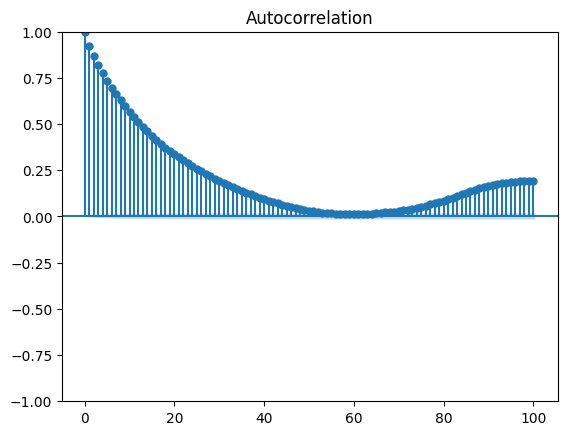

In [9]:
subset = df[df["Class"] == 1]


plot_acf(subset["Fare"], lags=100)
print()



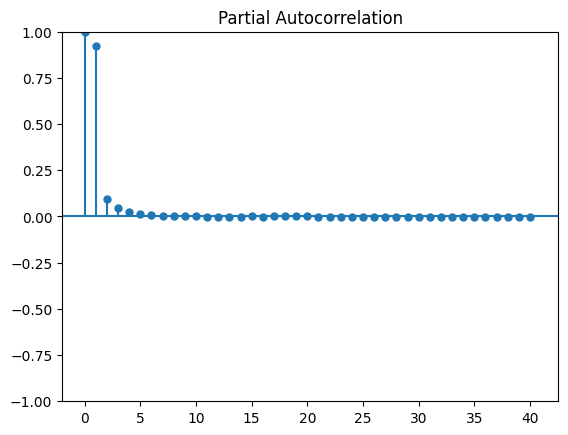

In [10]:
plot_pacf(subset["Fare"], lags=40)
print()

ValueError for 0: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 0.


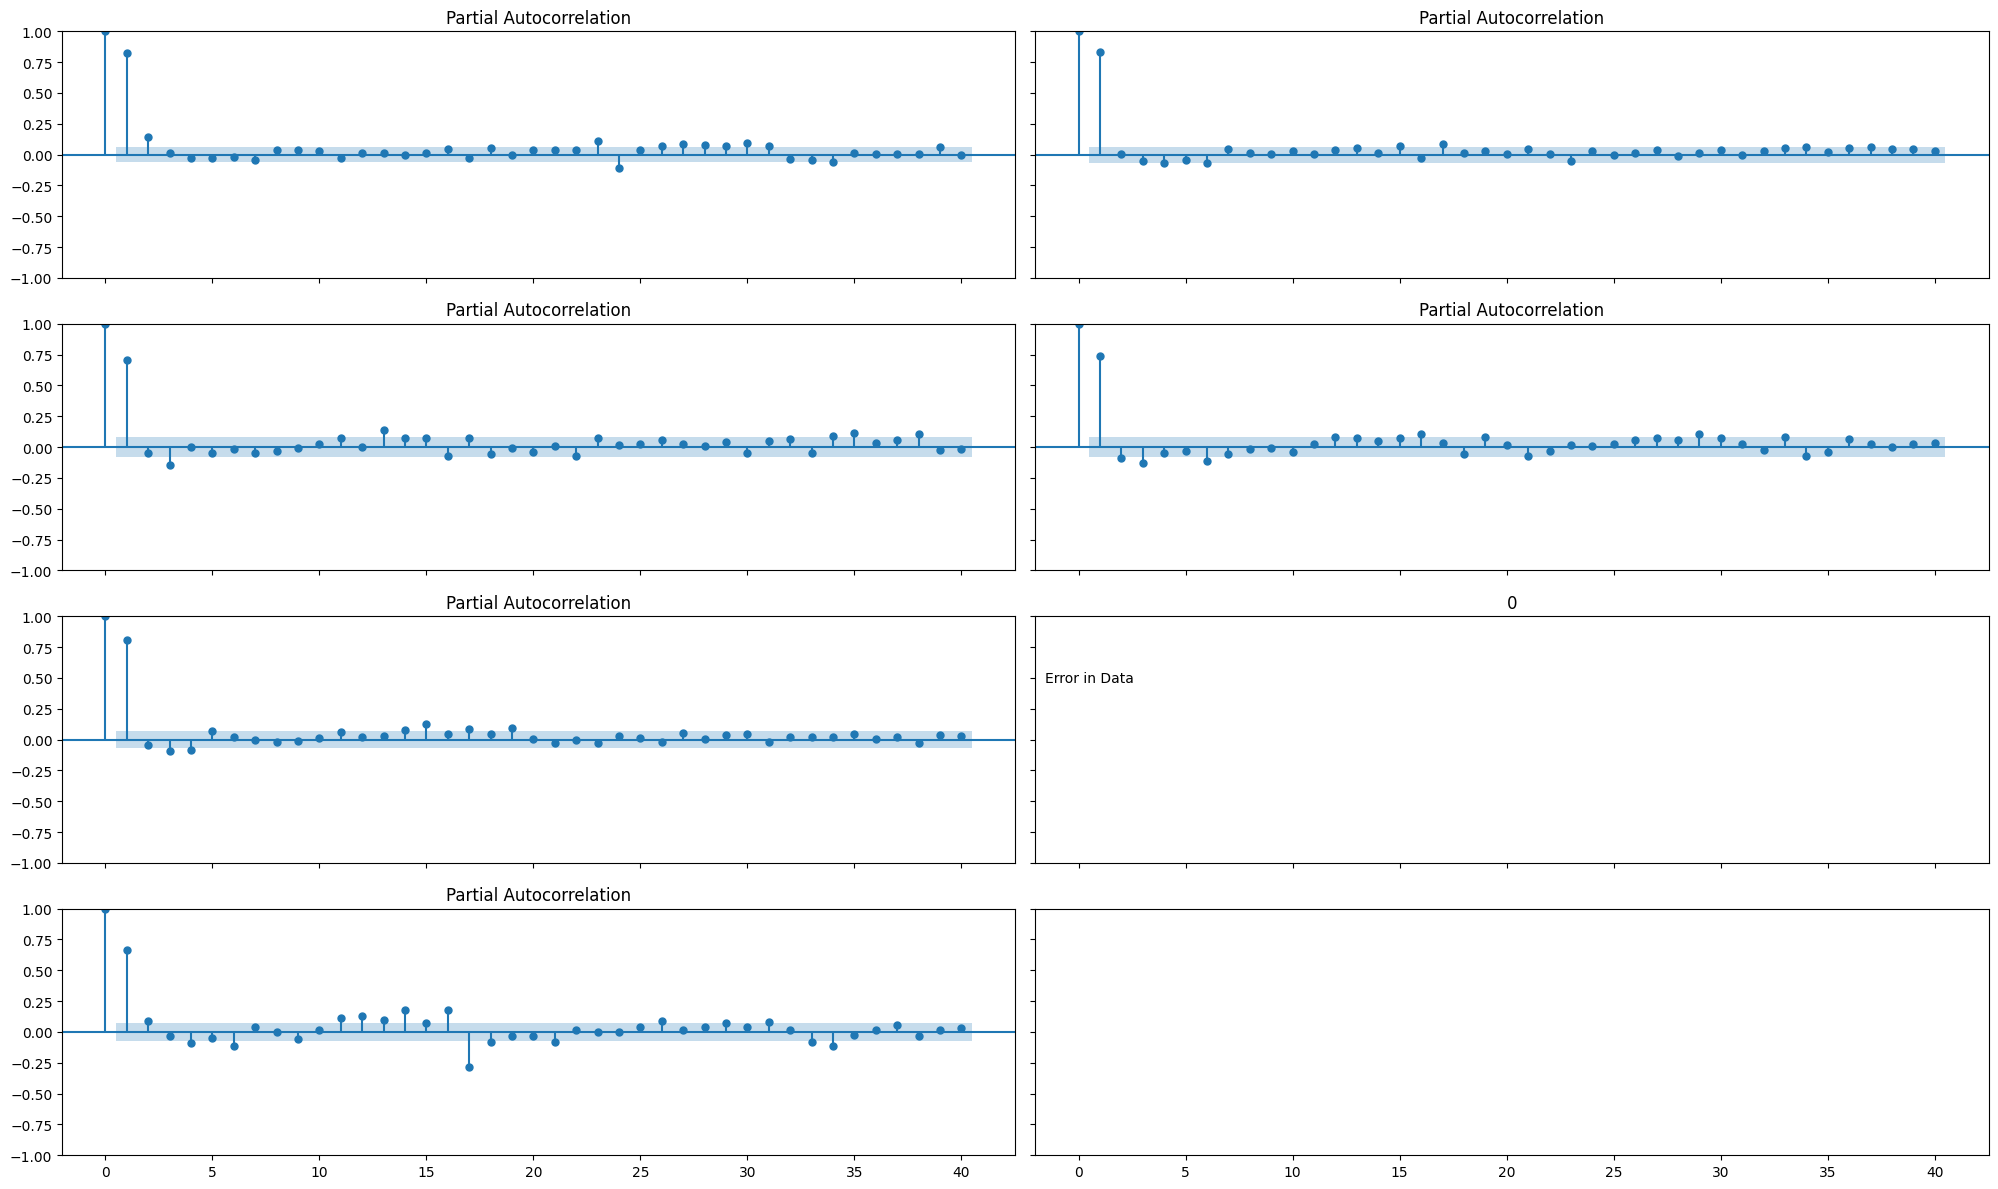

In [11]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = df["Destination"].unique()
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):
    
    try:
        subset = df[df["Airline"] == 0]
        subset = subset[subset["Class"] == 1]
        subset = subset[subset["Source"] == 0]
        subset = subset[subset["Destination"] == destination]
        axs[i].set_title(destination)
        axs[i].xaxis.set_ticks(np.arange(0, 41, 5))

        plot_pacf(subset["Fare"], ax=axs[i], lags=40)

    except ValueError as e:
        
        print(f"ValueError for {destination}: {e}")
        axs[i].text(0.5, 0.5, 'Error in Data', horizontalalignment='center', verticalalignment='center')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

dict = {}

        
# subset = df[df["Airline"] == 0]
subset = subset[subset["Class"] == 1]
# subset = subset[subset["Source"] == 0]
# subset = subset[subset["Destination"] == destination]

result = adfuller(subset["Fare"])
dict[destination] = (result[0], result[1])

'''except ValueError as e:
        print(f"ValueError for {destination}: {e}")
        dict[destination] = (None, None)'''

results_df = pd.DataFrame(dict).T
results_df.columns = ["ADF Statistic", "p-value"]

results_df

,ADF Statistic,p-value
3,-4.303358,0.000438


In [13]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# subset = df[df["Airline"] == 0]
subset = df[df["Class"] == 1]
# subset = subset[subset["Source"] == 1]
# subset = subset[subset["Destination"] == 2]

# subset = df

In [31]:
import pmdarima as pm

model = pm.auto_arima(subset["Fare"], seasonal=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=136.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4423275.541, Time=2.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4419177.786, Time=4.89 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4418506.090, Time=6.53 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4423273.542, Time=1.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=62.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4417287.817, Time=10.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=53.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4416786.473, Time=13.22 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=114.75 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4416443.411, Time=16.46 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=94.49 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4416216.856, Time=24.25 sec
 ARIMA(1,1,5)(0,0,0)[0] intercept   : AIC=inf, Time=140.28 sec
 ARIMA(0,1,5)(0,0,0)[0]   

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = subset["Fare"]
print (y.shape)


# Split the df into train and test
train_size = int(len(subset) * 0.8)

train = y[0:train_size]
test = y[train_size:len(subset)]

# Fit the ARIMA model on the training dataset
model = SARIMAX(subset["Fare"], order=(0, 1, 5))
model_fit = model.fit()
# print(model_fit.summary())
if model_fit:
    print("Model fitting successful.")



(248323,)


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Model fitting successful.


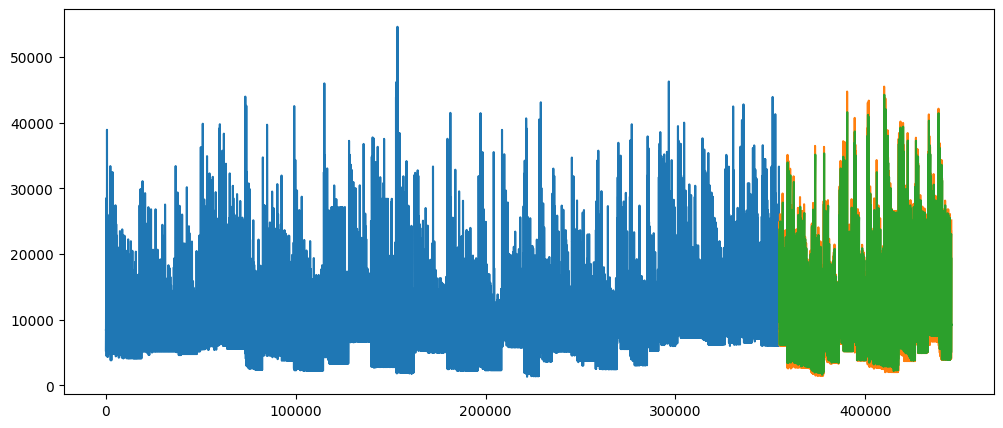

In [16]:
start = train_size  # Example start point for in-sample predictions
end = len(subset) - 1  # Example end point for in-sample predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

plt.figure(figsize=(12,5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [17]:
def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict['SARIMAX'] = [model, RMSE(test, predictions), MAPE(test, predictions)]

RMSE: 2195.1384584497773
MAPE: 10.03351563189078


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

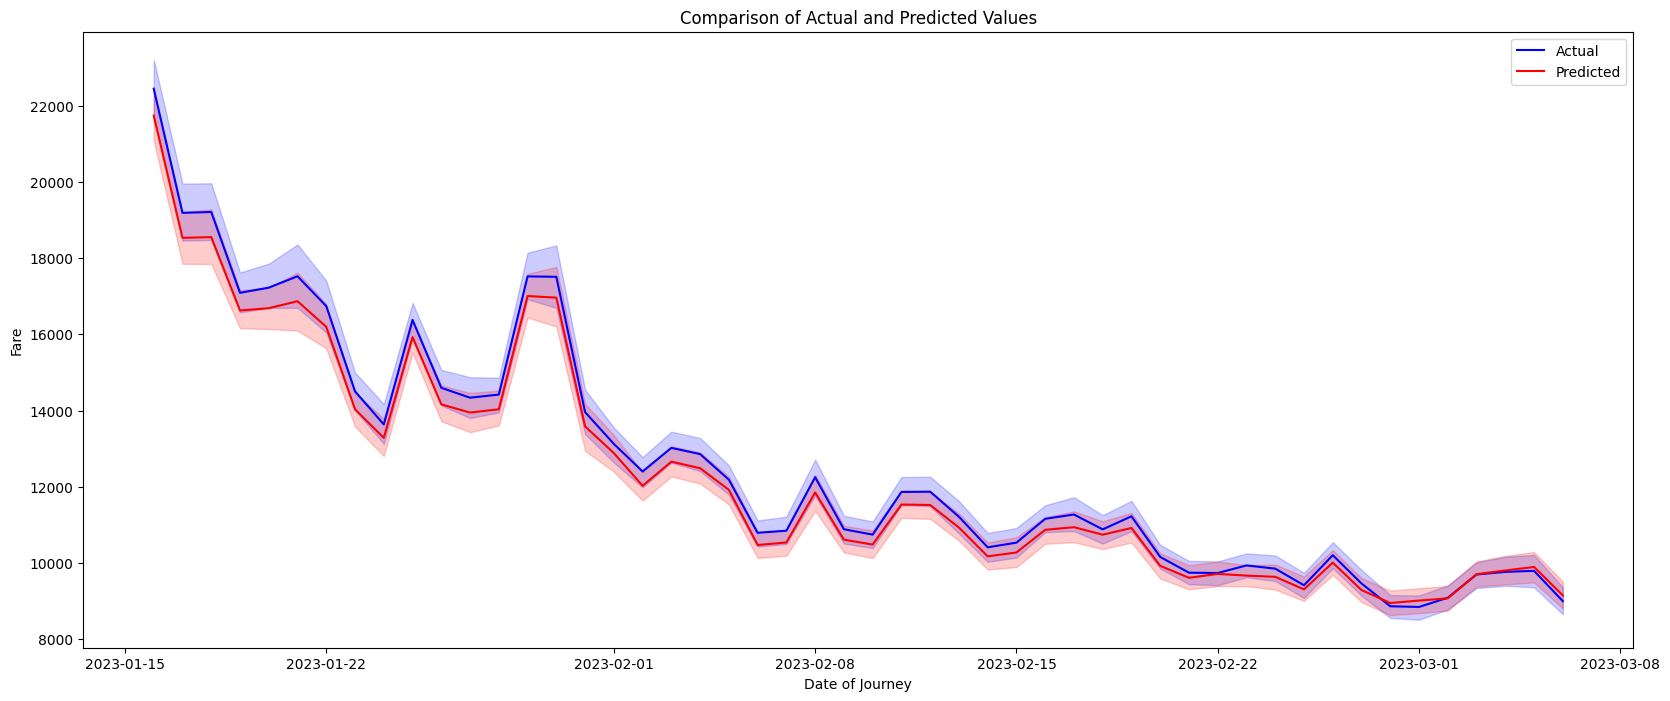

In [18]:
out=pd.DataFrame({'Price_actual':test,'Price_pred':predictions})
result=df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline']==8]
airline_df = airline_df[airline_df['Class']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

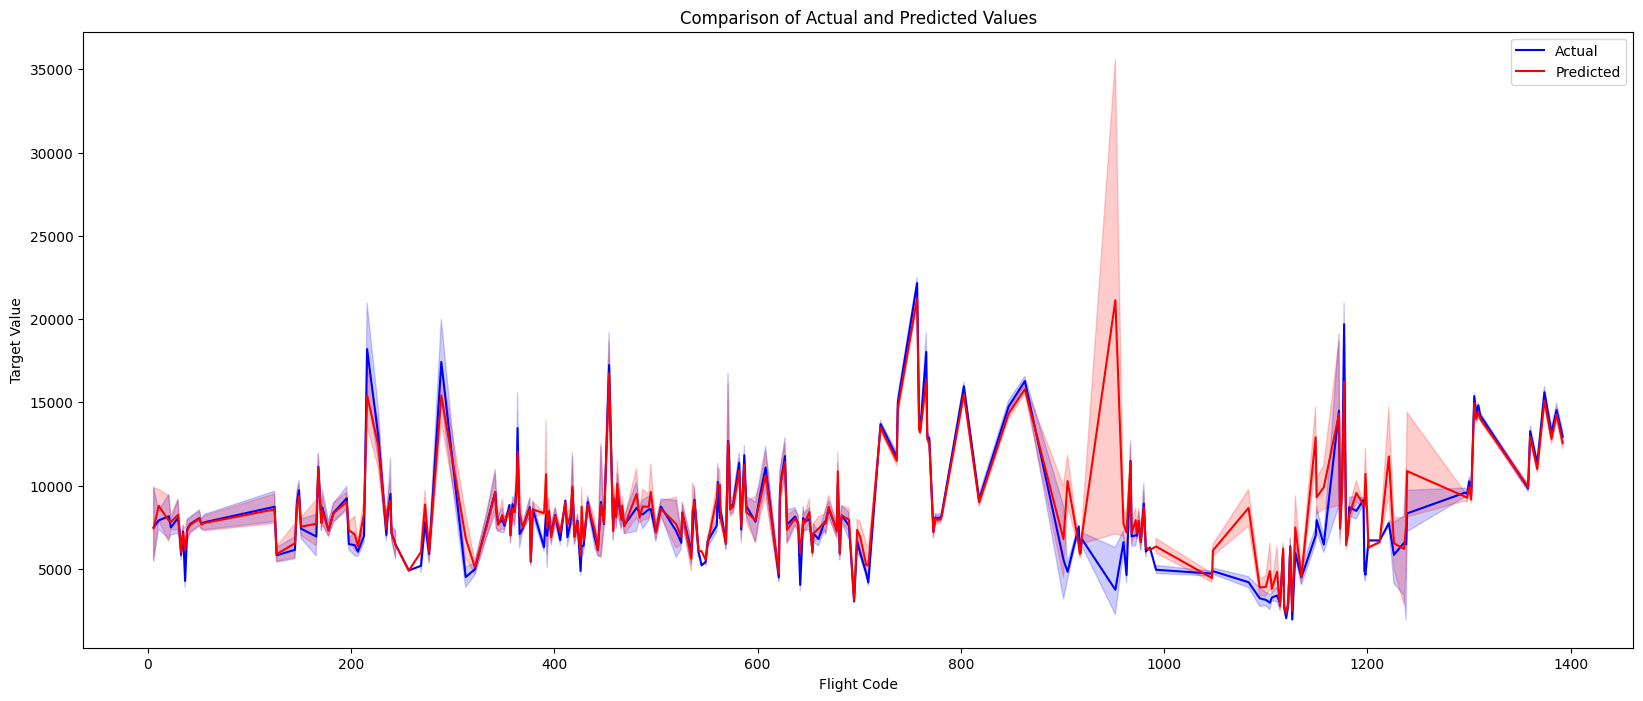

In [19]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestRegressor

X = subset.drop(['Fare', "Date_of_journey"], axis=1)
y = subset['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(f"RMSE: {RMSE(y_test, y_preds)}")
print(f"MAPE: {MAPE(y_test, y_preds)}")

models_dict["RandomForestRegressor"] = [model, RMSE(y_test, y_preds), MAPE(y_test, y_preds)]

RMSE: 1715.0838160768865
MAPE: 8.711058269014101


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

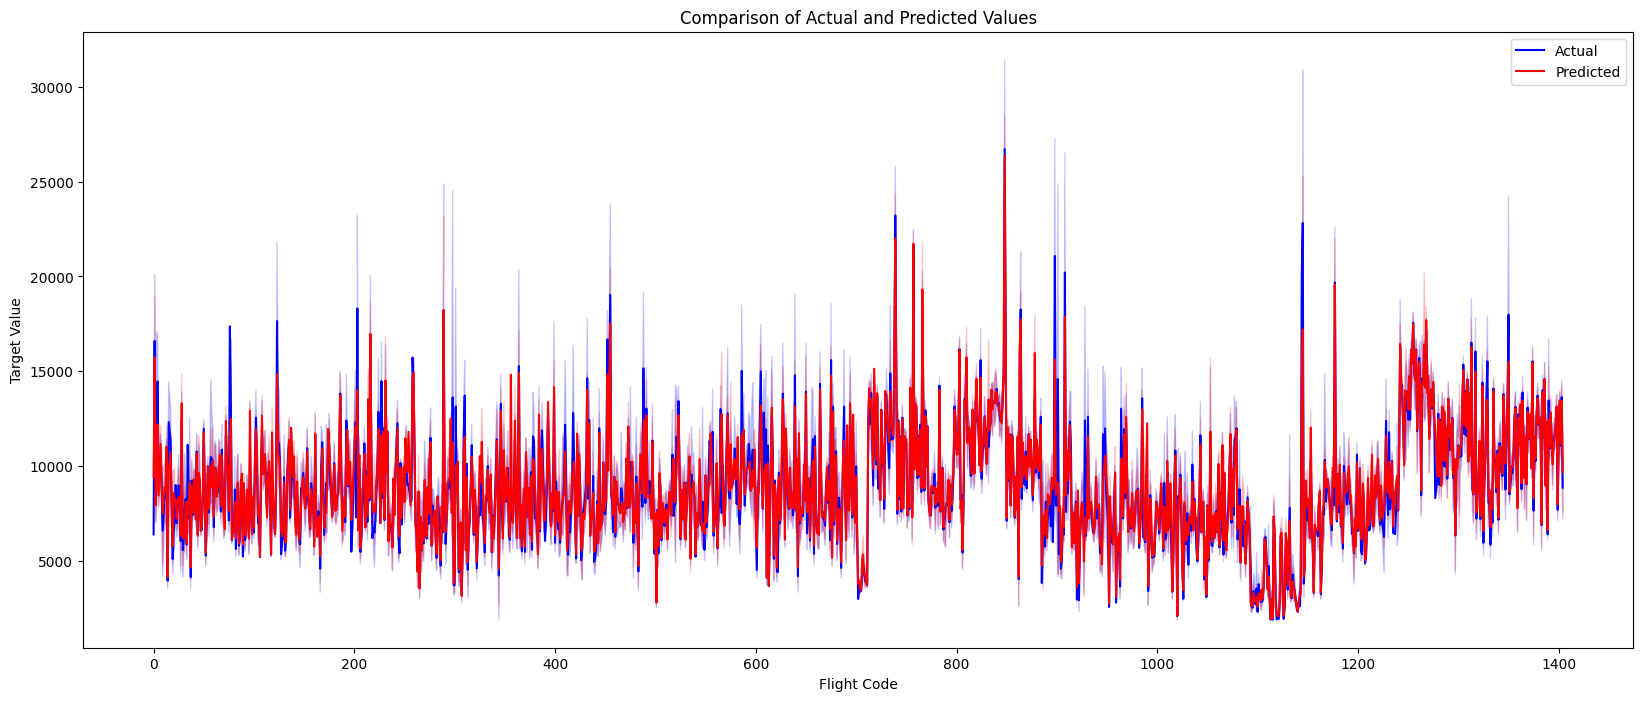

In [35]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

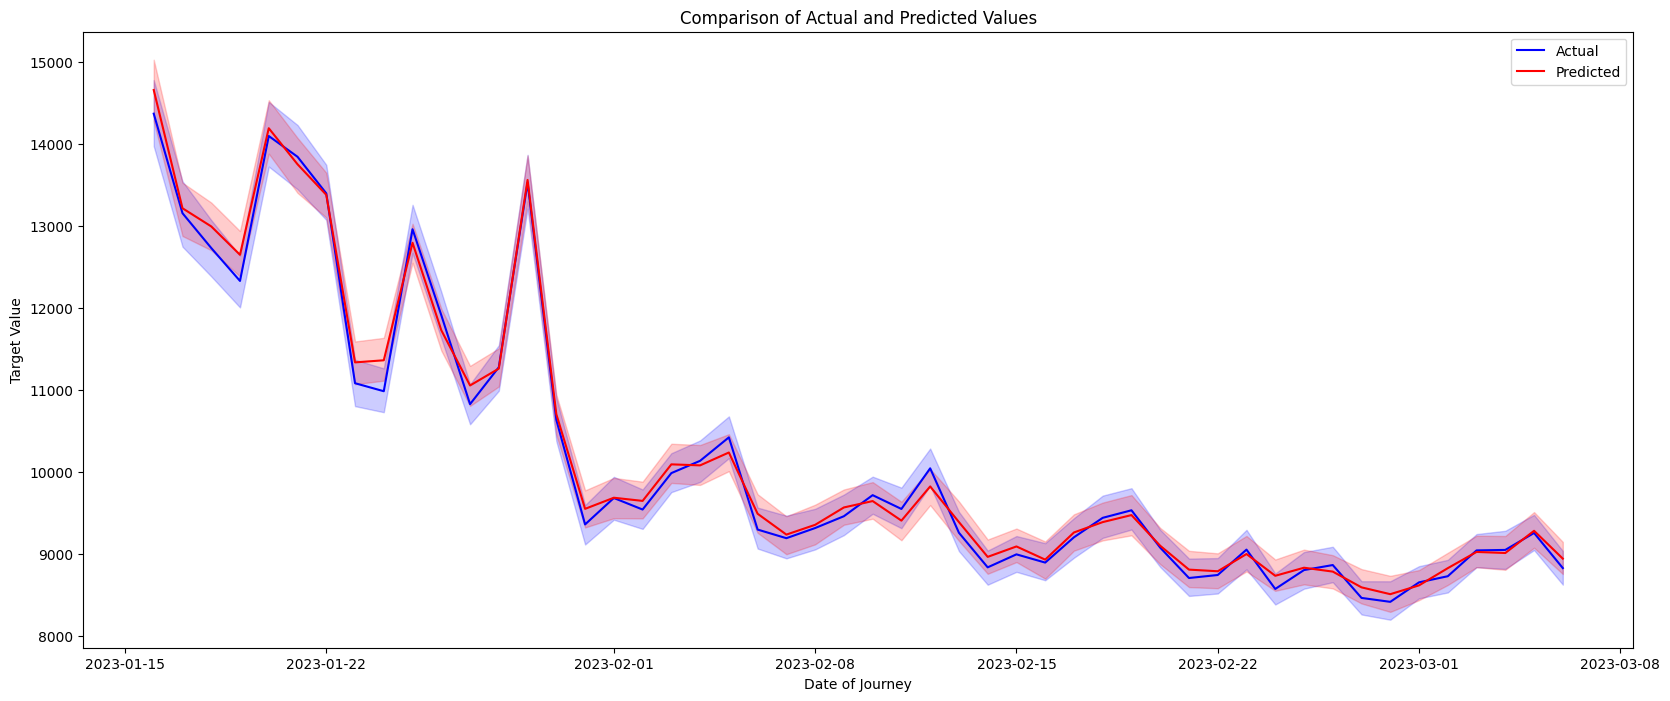

In [36]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


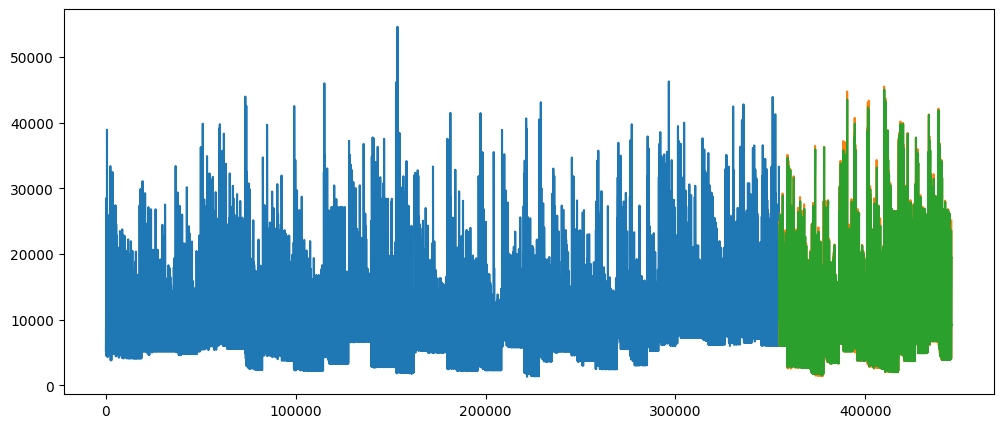

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(subset["Fare"], seasonal='add', seasonal_periods=7, use_boxcox = 0.01)

model_fit = model.fit()

predictions = model_fit.predict(start=train_size, end=len(subset)-1)

plt.figure(figsize=(12,5))

plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [38]:
print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict['HoltWinters'] = [model, RMSE(test, predictions), MAPE(test, predictions)]

RMSE: 2193.834924605024
MAPE: 8.086031142703083


c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

<Figure size 2000x800 with 0 Axes>

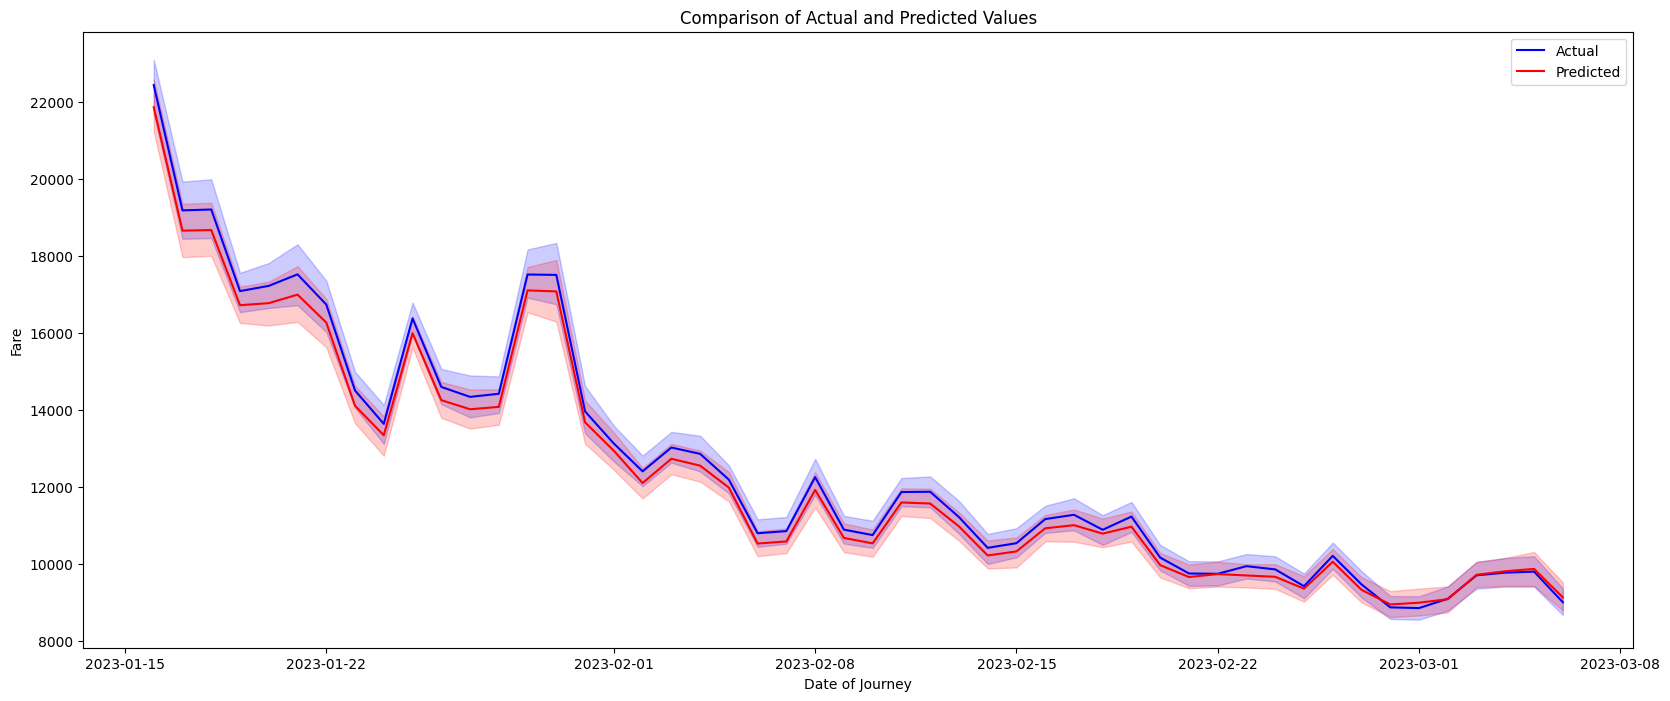

In [39]:
out=pd.DataFrame({'Price_actual':test,'Price_pred':predictions})
result=df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline']==8]
airline_df = airline_df[airline_df['Class']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Abhim\miniconda3\envs\env1\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version

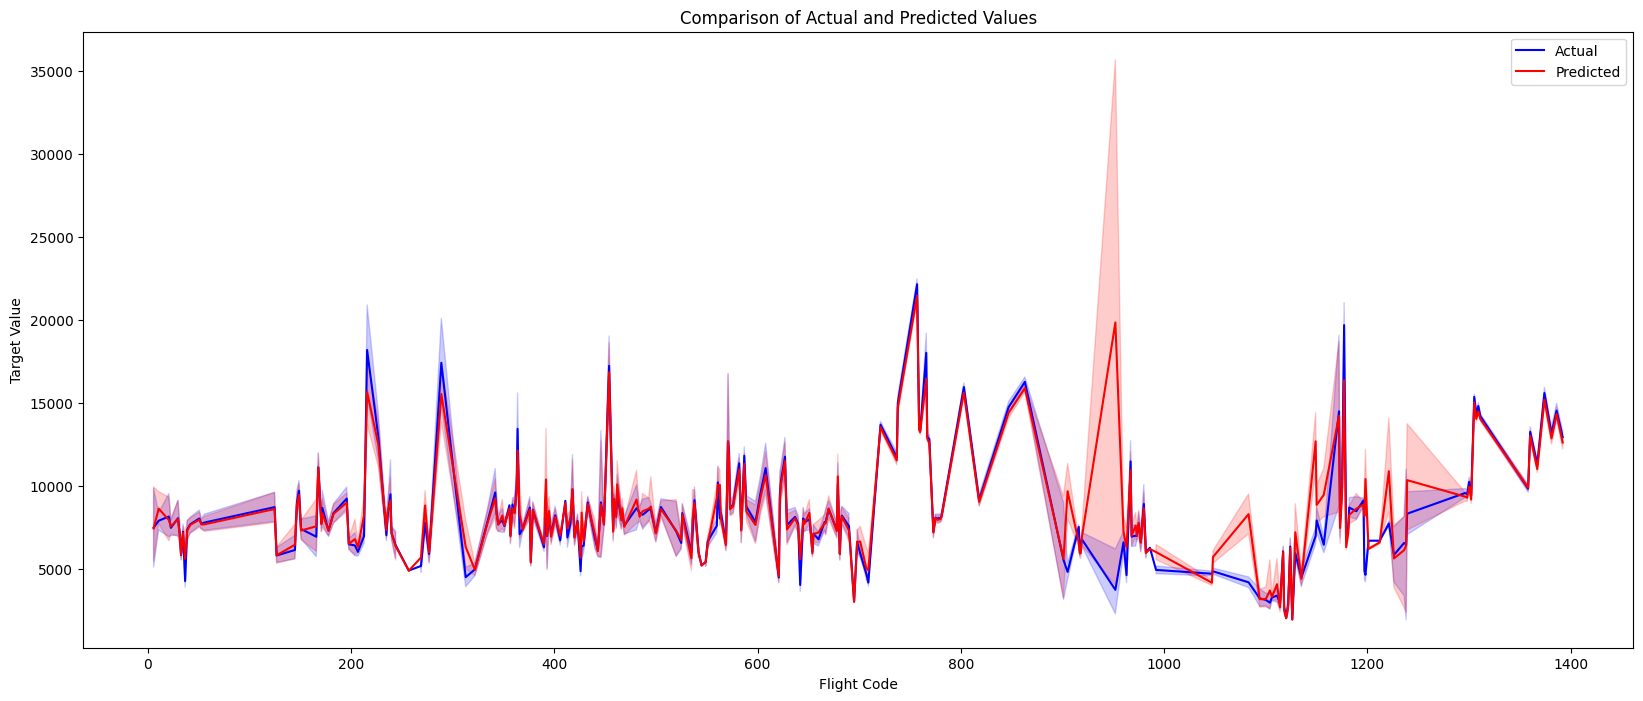

In [40]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [41]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ["Model", "RMSE", "MAPE"]
models_df


,Model,RMSE,MAPE
SARIMAX,<statsmodels.tsa.statespace.sarimax.SARIMAX ob...,2195.138458,10.033516
RandomForestRegressor,"(DecisionTreeRegressor(max_features=1.0, rando...",1715.083816,8.711058
HoltWinters,<statsmodels.tsa.holtwinters.model.Exponential...,2193.834925,8.086031
